# EDA and Data Preprocessing

### Including Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from warnings import filterwarnings

filterwarnings("ignore")

### Load Dataset

In [4]:
df = pd.read_csv("insurance.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Info About Data

In [3]:
df_copy.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df_copy.shape

(1338, 7)

In [5]:
df_copy.info() # info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_copy.describe().T # info statistic about data

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df_copy.corr() # we can't see many meaningful values

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df_copy["sex"].value_counts() # male-female counts almost equal

male      676
female    662
Name: sex, dtype: int64

In [9]:
df_copy["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
df_copy["smoker"].value_counts() # non-smokers more than smokers(almost 4 times)

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df_copy["region"].value_counts() # Almost equal distrubition

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Univariate Data Analysis

In [12]:
numerical_variables = ["age", "bmi", "children", "charges"]
categorical_variables = ["sex", "smoker", "region"]

Firstly lets write the functions of graphs we want to plot

In [13]:
def PlotHistogram(variable):
    plt.figure()
    plt.hist(df_copy[variable], bins=100, color="blue")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}" .format(variable))
    plt.show()

In [10]:
def BoxPlot(variable):
    plt.boxplot(df_copy[variable])
    plt.xlabel(variable)
    plt.ylabel("Value")
    plt.title("Boxplot for " + variable + " variable")
    plt.show()

In [15]:
def PlotBar(variable, n=5):
    data_ = df_copy[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]
    
    plt.figure()
    plt.bar(data_counts.index, data_counts, color="red")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}" .format(variable))
    plt.show()

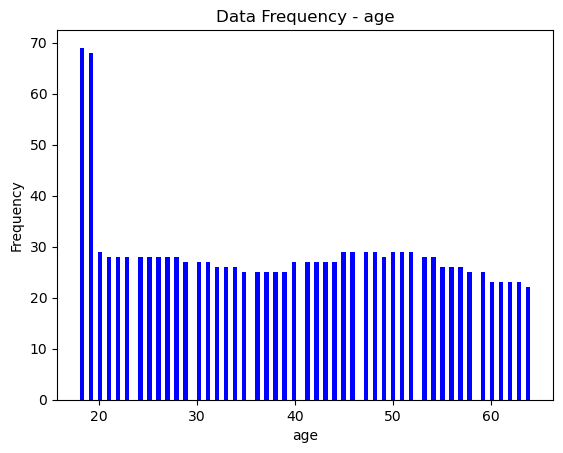

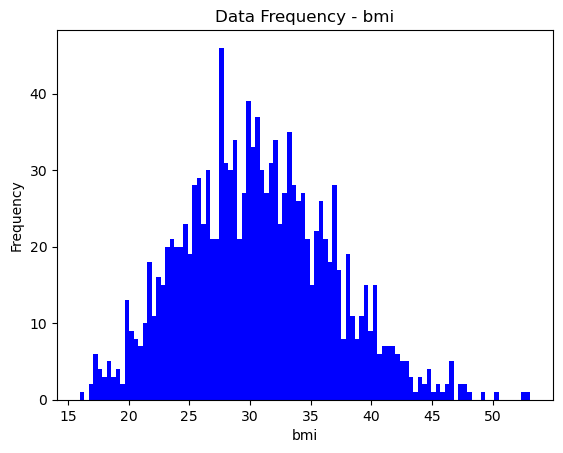

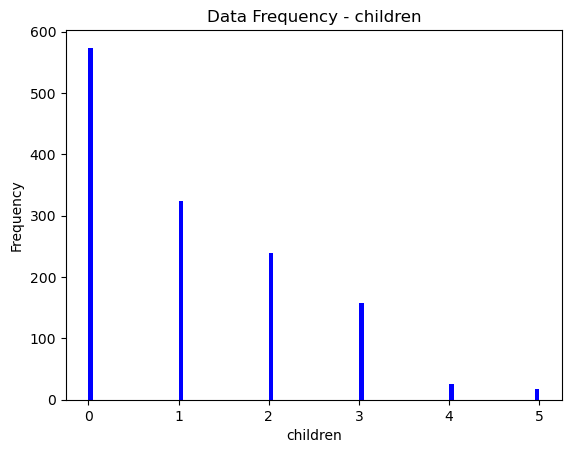

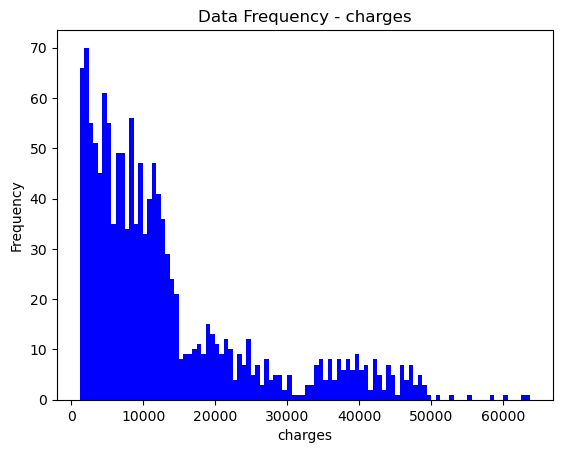

In [16]:
for i in numerical_variables:
    PlotHistogram(i)
# bmi variable shows normal distrubition but charges variable shows skewed right distrubition

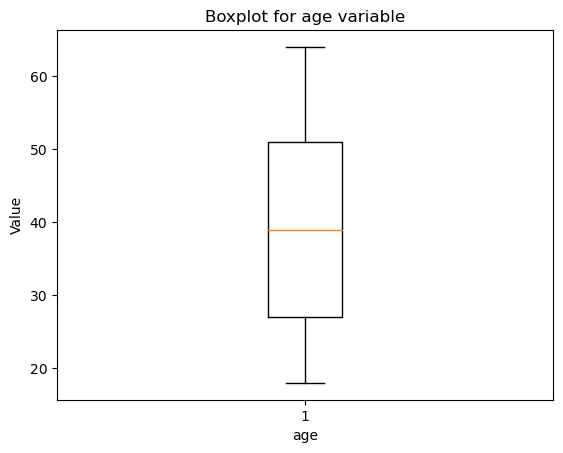

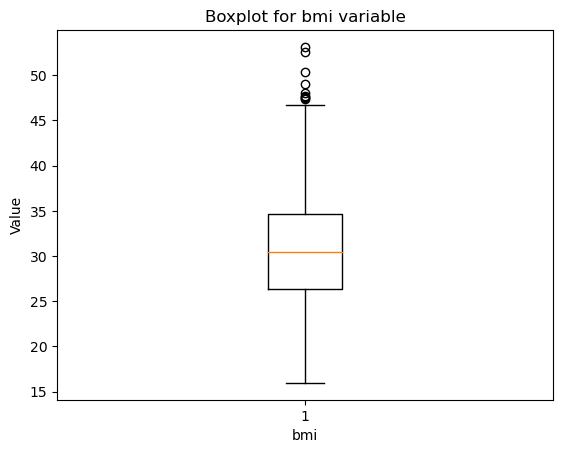

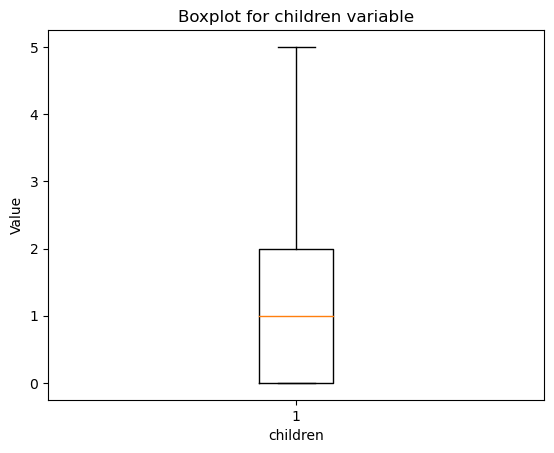

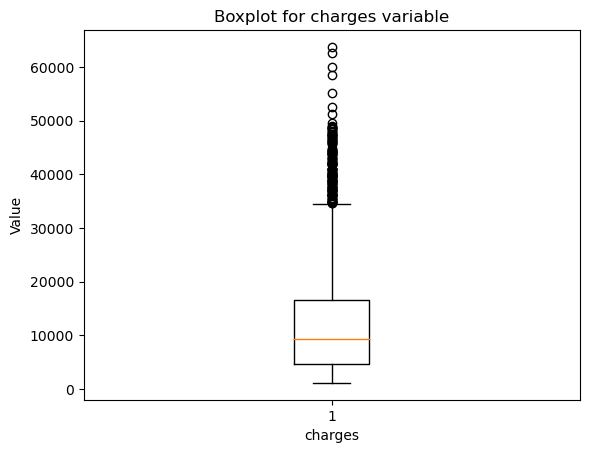

In [17]:
for i in numerical_variables: # charges and bmi variables have outlier so we must solve this problem it later
    BoxPlot(i)

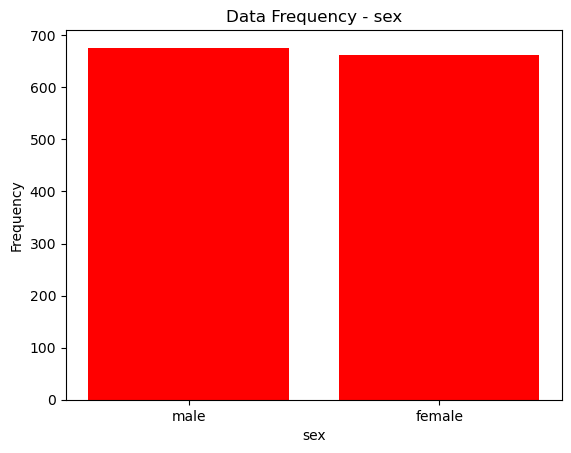

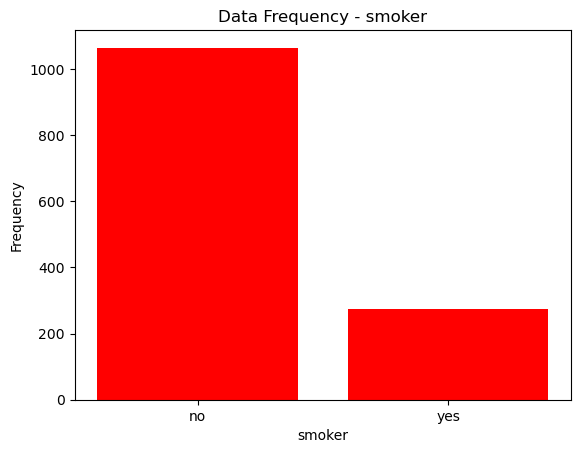

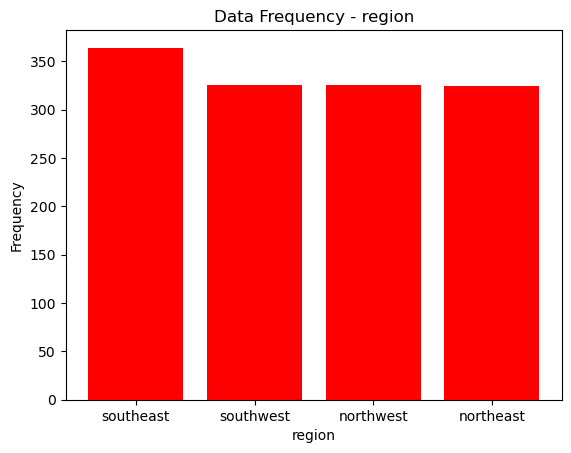

In [18]:
for i in categorical_variables:
    PlotBar(i)

### Data Preprocessing

#### Outlier Analysis

In [5]:
outlier_df = ["bmi", "charges"]

In [6]:
def BoxPlotMethod(col_name, df):
    df_variable = df[col_name]
    Q1 = df_variable.quantile(0.25)
    Q3 = df_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    low_outlier_df = (df_variable < lower_limit)
    up_outlier_df = (df_variable > upper_limit)
    df_variable[low_outlier_df] = lower_limit
    df_variable[up_outlier_df] = upper_limit

In [8]:
for i in outlier_df:
    BoxPlotMethod(i, df_copy)

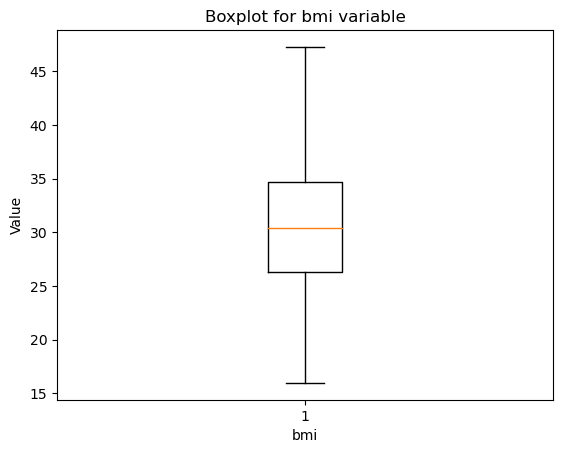

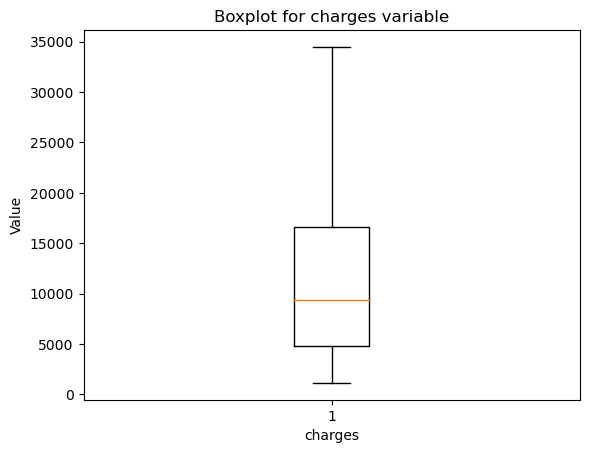

In [11]:
for i in outlier_df: 
    BoxPlot(i)

We catched outliers with BoxPlot Method and we solved this problem with suppression approach

#### Encoding and Scaling

In [12]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
scale_df = df_copy[["age", "bmi", "charges"]]
encoding_df = df_copy[["sex", "smoker", "region"]]

In [14]:
lbe = LabelEncoder()
encoding_df["sex"] = lbe.fit_transform(encoding_df["sex"])
encoding_df["smoker"] = lbe.fit_transform(encoding_df["smoker"])

In [15]:
encoding_df = pd.get_dummies(encoding_df, columns=["region"], prefix=["region"])
encoding_df.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


  We applied 0-1 transformation in sex and smoker variables because including just binary values but we 
applied one-hot encoding in region variable because including 4 values so we need to make one-hot
encoding

In [16]:
col_list = ["age", "bmi", "charges"]
scale_df = preprocessing.normalize(scale_df)
scale_df = pd.DataFrame(scale_df, columns=col_list)
scale_df.head()

,age,bmi,charges
0,0.001125,0.001652,0.999998
1,0.010429,0.019566,0.999754
2,0.006293,0.007416,0.999953
3,0.001501,0.001033,0.999998
4,0.008275,0.007468,0.999938


We must make scale processing so that our machine learning algorithms can learn better

In [17]:
df_copy[["children"]]

,children
0,0
1,1
2,3
3,0
4,0
...,...
1333,3
1334,0
1335,0
1336,0


In [18]:
merged_df = pd.concat([encoding_df, df_copy[["children"]]], axis=1)
cleaned_df = pd.concat([merged_df, scale_df], axis=1)

In [19]:
cleaned_df.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,children,age,bmi,charges
0,0,1,0,0,0,1,0,0.001125,0.001652,0.999998
1,1,0,0,0,1,0,1,0.010429,0.019566,0.999754
2,1,0,0,0,1,0,3,0.006293,0.007416,0.999953
3,1,0,0,1,0,0,0,0.001501,0.001033,0.999998
4,1,0,0,1,0,0,0,0.008275,0.007468,0.999938


In [31]:
df_copy = cleaned_df.copy()
df_copy.to_csv("cleaned_df.csv", index=False)

Preprocessing was completed and we saved cleaned dataset

# Modelling

In [8]:
cleaned_df = pd.read_csv("cleaned_df.csv")
cleaned_df.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,children,age,bmi,charges
0,0,1,0,0,0,1,0,0.001125,0.001652,0.999998
1,1,0,0,0,1,0,1,0.010429,0.019566,0.999754
2,1,0,0,0,1,0,3,0.006293,0.007416,0.999953
3,1,0,0,1,0,0,0,0.001501,0.001033,0.999998
4,1,0,0,1,0,0,0,0.008275,0.007468,0.999938


In [9]:
y = cleaned_df["charges"]
x = cleaned_df.drop(["charges"], axis=1)
# We must seperate target variable from else variable(x-y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20, 
                                                    random_state=42)
# We did train-test split

  We will try respectively many regression algorithms and we will examine error metrics then we will
do model selection

## Multilinear Regression

In [11]:
lm = LinearRegression()
multi_linear_model = lm.fit(x_train, y_train)

In [12]:
print(multi_linear_model.intercept_)
print(multi_linear_model.coef_)

343906006.0614397
[-6.31501233e-06 -1.28580931e-05 -3.43906005e+08 -3.43906005e+08
 -3.43906005e+08 -3.43906005e+08  1.88059787e-06  3.54075546e-03
 -1.69504682e-02]


### Prediction

In [57]:
rmse = np.sqrt(mean_squared_error(y_train, multi_linear_model.predict(x_train)))
rmse # train error

2.4570097785358553e-05

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, multi_linear_model.predict(x_test)))
rmse # test error

2.470999383498395e-05

We must examine both train and test error because we must see overfit our model

### Model Tuning/Validation

In [15]:
cross_val_score(multi_linear_model, x_train, y_train, cv=10, scoring="r2").mean()

0.9033528234655887

In [16]:
cross_val_score(multi_linear_model, x_test, y_test, cv=10, scoring="r2").mean()

0.8410701593152536

In [46]:
np.sqrt(-cross_val_score(multi_linear_model, 
                         x_train, 
                         y_train, 
                         cv=10, 
                         scoring="neg_mean_squared_error")).mean() # My real train error

2.4245478773052124e-05

In [47]:
np.sqrt(-cross_val_score(multi_linear_model, 
                         x_test, 
                         y_test, 
                         cv=10, 
                         scoring="neg_mean_squared_error")).mean() # My real test error

2.4424991798071227e-05

## ElasticNet Regression

In [17]:
enet_model = ElasticNet().fit(x_train, y_train)

In [18]:
print(enet_model.coef_)
print(enet_model.intercept_)

[-0.  0.  0.  0. -0. -0.  0. -0. -0.]
0.9999558209992686


### Prediction

In [68]:
enet_model.predict(x_test)

array([0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995582,
       0.99995582, 0.99995582, 0.99995582, 0.99995582, 0.99995

In [59]:
y_pred = enet_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

8.581358224073657e-05

In [70]:
r2_score(y_test, y_pred)

-0.004532409506168733

### Model Tuning

In [19]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(x_train, y_train)

In [20]:
enet_cv_model.alpha_

5.056191523272888e-08

In [21]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(x_train,y_train)

In [22]:
y_pred = enet_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred)) # As we see our error rate decreased after model tuning

2.5587617006964812e-05

## KNN

In [23]:
knn = KNeighborsRegressor()
knn_model = knn.fit(x_train, y_train)
knn_model

KNeighborsRegressor()

In [24]:
knn_model.n_neighbors

5

In [82]:
knn_model.effective_metric_

'euclidean'

### Prediction

In [84]:
y_pred = knn_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.216204147831472e-05

In [87]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("RMSE value for k =", k, " -> ", rmse)

RMSE value for k = 1  ->  0.0
RMSE value for k = 2  ->  4.885665306926366e-06
RMSE value for k = 3  ->  7.27203233269377e-06
RMSE value for k = 4  ->  9.666183446661558e-06
RMSE value for k = 5  ->  1.1886826745664561e-05
RMSE value for k = 6  ->  1.3379118888343996e-05
RMSE value for k = 7  ->  1.5089966042472764e-05
RMSE value for k = 8  ->  1.7264441987760972e-05
RMSE value for k = 9  ->  1.9088361726255402e-05
RMSE value for k = 10  ->  2.1029268769995393e-05


### Model Tuning

In [25]:
knn_params = {'n_neighbors': np.arange(5,100,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [26]:
knn_cv_model.best_params_

{'n_neighbors': 5}

In [27]:
knn_tuned = KNeighborsRegressor(n_neighbors = 5)
knn_tuned_model = knn_tuned.fit(x_train, y_train)

In [110]:
np.sqrt(mean_squared_error(y_test, knn_tuned_model.predict(x_test))) # RMSE didn't change after model tuning

1.216204147831472e-05

## Support Vector Regression

In [28]:
svr = SVR(kernel="linear")
svr_model = svr.fit(x_train, y_train)
svr_model

SVR(kernel='linear')

### Prediction

In [122]:
y_pred = svr_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.0004311175971931094

### Model Tuning

In [128]:
svr_params = {"C": np.arange(0.001, 2, 0.01),
              "kernel": ["linear", "rbf", "poly", "sigmoid"]}
svr_cv = GridSearchCV(svr_model, svr_params, cv = 10)
svr_cv_model = svr_cv.fit(x_train,y_train)

In [129]:
svr_cv_model.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [29]:
svr_tuned = SVR(kernel="linear", C=0.001)
svr_tuned_model = svr_tuned.fit(x_train, y_train)

In [141]:
y_pred = svr_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred)) 
# It didn't change

0.0004311175971931094

## MLP

In [30]:
mlp = MLPRegressor(hidden_layer_sizes = (100,20))
mlp_model = mlp.fit(x_train, y_train)
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [145]:
mlp_model.n_layers_

4

In [146]:
mlp_model.hidden_layer_sizes

(100, 20)

### Prediction

In [149]:
y_pred = mlp_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.01704996114762233

### Model Tuning

In [150]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
              'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
              'activation': ['relu','logistic', 'tanh'],
              'solver': ['lbfgs', 'sgd', 'adam']}
mlp_cv = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model = mlp_cv.fit(x_train, y_train)

In [152]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.1,
 'hidden_layer_sizes': (300, 200, 150),
 'solver': 'adam'}

In [31]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300,200,150),
                         activation = 'logistic', solver = 'adam')
mlp_tuned_model = mlp_tuned.fit(x_train, y_train)

In [32]:
y_pred = mlp_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate decreased after model tuning

0.00023347954948582878

## CART

In [33]:
cart = DecisionTreeRegressor(min_samples_split = 2)
cart_model = cart.fit(x_train, y_train)
cart_model

DecisionTreeRegressor()

### Prediction

In [34]:
y_pred =cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.715156439978025e-06

### Model Tuning

In [26]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,20),
               "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
cart_cv = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model = cart_cv.fit(x_train, y_train)

In [27]:
cart_cv_model.best_params_

{'criterion': 'poisson', 'max_leaf_nodes': 19, 'min_samples_split': 6}

In [35]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 19,
                                   min_samples_split = 6,
                                   criterion = 'poisson')
cart_tuned_model = cart_tuned.fit(x_train, y_train)

In [36]:
y_pred =cart_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate decreased after model tuning

1.2803682437468744e-05

## Random Forests

In [37]:
rf = RandomForestRegressor(random_state = 42)
rf_model = rf.fit(x_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

### Prediction

In [38]:
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5.054276017807016e-06

### Model Tuning

In [8]:
rf_params = {'max_depth': list(range(1,10)),
             'max_features': [3,5,10,15],
             'n_estimators': [100, 200, 500],
             'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
rf_cv = GridSearchCV(rf_model, 
                     rf_params, 
                     cv = 10, 
                     n_jobs = -1)
rf_cv_model = rf_cv.fit(x_train, y_train)

In [9]:
rf_cv_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 9,
 'max_features': 10,
 'n_estimators': 500}

In [39]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 10, 
                                 n_estimators = 500)
rf_tuned_model = rf_tuned.fit(x_train, y_train)

In [40]:
y_pred = rf_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate didn't decrease after model tuning also more increased

5.542392251301976e-06

In [39]:
Importance = pd.DataFrame({"Importance": rf_tuned_model.feature_importances_*100},
                           index = x_train.columns)

Text(0.5, 0, 'Variable Importance Levels')

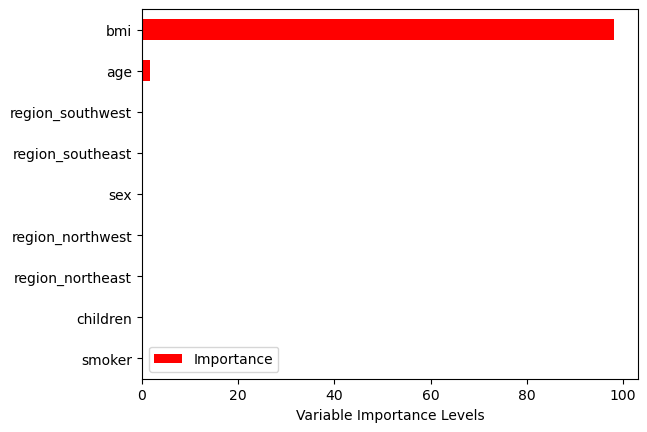

In [40]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Levels") # As we see the most important variable is bmi

## Gradient Boosting Machines

In [41]:
gbm = GradientBoostingRegressor()
gbm_model = gbm.fit(x_train, y_train)
gbm_model

GradientBoostingRegressor()

### Prediction

In [42]:
y_pred = gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.8962772997125546e-06

### Model Tuning

In [43]:
gbm_params = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 1, 2, 4],
              'max_depth': [3, 5, 8, 50, 100, 150],
              'n_estimators': [200, 500, 1000, 2000],
              'subsample': [1, 0.5, 0.75]}
gbm_cv = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model = gbm_cv.fit(x_train, y_train)

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


In [44]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.75}

In [43]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 3, 
                                      n_estimators = 1000, 
                                      subsample = 0.75)

gbm_tuned_model = gbm_tuned.fit(x_train,y_train)

In [44]:
y_pred = gbm_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate decreased after model tuning

2.543577929583413e-06

In [47]:
Importance = pd.DataFrame({"Importance": gbm_tuned_model.feature_importances_*100},
                           index = x_train.columns)

Text(0.5, 0, 'Variable Importance Levels')

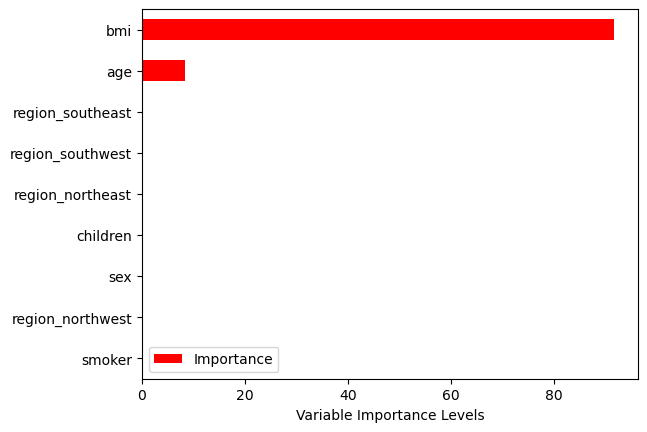

In [48]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Levels")

## XGBoost

In [45]:
xgb = XGBRegressor()
xgb_model = xgb.fit(x_train, y_train)
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Prediction

In [46]:
y_pred = xgb_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.984513562529823e-05

### Model Tuning

In [51]:
xgb_params = {'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1], 
              'n_estimators':[100, 200, 500, 1000],
              'max_depth': [2, 3, 4, 5, 6],
              'learning_rate': [0.01, 0.1, 0.5]}
xgb_cv = GridSearchCV(xgb_model, 
                      param_grid = xgb_params, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)
xgb_cv_model = xgb_cv.fit(x_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [52]:
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200}

In [47]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 200) 

xgb_tuned_model = xgb_tuned.fit(x_train, y_train)

In [48]:
y_pred = xgb_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate increased after model tuning

4.4167050659070545e-05

## LightGBM

In [49]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(x_train, y_train)
lgbm_model

LGBMRegressor()

### Prediction

In [50]:
y_pred = lgbm_model.predict(x_test, num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

2.5707906852722466e-05

### Model Tuning

In [57]:
lgbm_params = {'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
               'learning_rate': [0.01, 0.1, 0.5, 1],
               'n_estimators': [20, 40, 100, 200, 500, 1000],
               'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

lgbm_cv = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs = -1, verbose = 2)
lgbm_cv_model = lgbm_cv.fit(x_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


In [58]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 40}

In [51]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 40,
                           colsample_bytree = 0.9)

lgbm_tuned_model = lgbm_tuned.fit(x_train,y_train)

In [52]:
y_pred = lgbm_tuned_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Error rate little decreased after model tuning

2.3360269473094287e-05

In [65]:
models = [multi_linear_model,
          enet_tuned,
          knn_tuned_model,
          svr_tuned_model,
          mlp_tuned_model,
          cart_tuned_model,
          rf_model,
          rf_tuned_model,
          gbm_tuned_model,
          xgb_tuned_model,
          lgbm_tuned_model]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    error_rate = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(names + ":" )
    print("Error Rate: {:%}".format(error_rate))

----------------------------
LinearRegression:
Error Rate: 0.002471%
----------------------------
ElasticNet:
Error Rate: 0.002559%
----------------------------
KNeighborsRegressor:
Error Rate: 0.001216%
----------------------------
SVR:
Error Rate: 0.043112%
----------------------------
MLPRegressor:
Error Rate: 0.023348%
----------------------------
DecisionTreeRegressor:
Error Rate: 0.001280%
----------------------------
RandomForestRegressor:
Error Rate: 0.000505%
----------------------------
RandomForestRegressor:
Error Rate: 0.000554%
----------------------------
GradientBoostingRegressor:
Error Rate: 0.000254%
----------------------------
XGBRegressor:
Error Rate: 0.004417%
----------------------------
LGBMRegressor:
Error Rate: 0.002336%


We can visualize error rates of all model

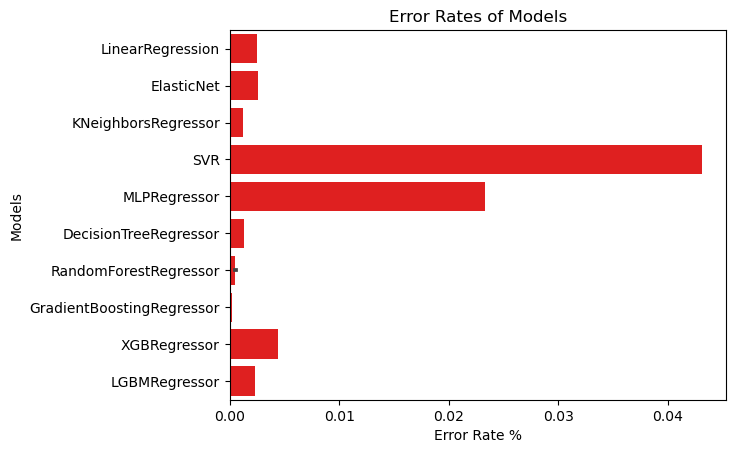

In [66]:
result = []
results = pd.DataFrame(columns= ["Models","Error Rate"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    error_rate = np.sqrt(mean_squared_error(y_test, y_pred))
    result = pd.DataFrame([[names, error_rate*100]], columns= ["Models","Error Rate"])
    results = results.append(result)
    
sns.barplot(x= 'Error Rate', y = 'Models', data=results, color="r")
plt.xlabel('Error Rate %')
plt.title('Error Rates of Models');  

As we see our lowest error rate model is gbm_tuned_model so we can say the best algorithm is GBM for this dataset.